# Analysing topic model evaluation metrics

In [47]:
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import manifold
from sklearn.preprocessing import MinMaxScaler

metric_names = ['c_npmi', 'c_uci', 'c_v', 'c_w2v', 'perplexity', 'u_mass']
param_names = ['alpha', 'beta', 'num_topics']

### Load saved metrics

In [7]:
with open('../data/lee-metrics.json') as f:
    models = json.load(f)

df = pd.DataFrame(models)
df.head()

,alpha,beta,c_npmi,c_uci,c_v,c_w2v,coords,num_topics,perplexity,u_mass
0,0.01,0.01,-0.003759,-1.836443,0.449097,0.998124,"[0.3720097152748205, 1.0813154600300736]",5,-6.246609,-2.393090
1,0.01,0.01,-0.037455,-2.854046,0.470005,0.998854,"[0.14137447541242126, 0.09896699150563214]",10,-6.302226,-2.233028
2,0.01,0.01,-0.059600,-3.329506,0.433467,0.998855,"[-0.03094414892392135, -0.41066024722653116]",15,-6.363658,-2.439774
3,0.01,0.01,-0.075871,-3.677816,0.412369,0.998948,"[-0.18770661151304485, -0.7328761790098938]",20,-6.402373,-2.509307
4,0.01,0.10,-0.008113,-2.012630,0.449335,0.998335,"[0.2417932688714692, 0.9375419503545677]",5,-6.038808,-2.413199


### Add ranks of absolute metric values

In [21]:
metric_names_with_ranks = [m + '-rank' for m in metric_names]
df[metric_names_with_ranks] = df[metric_names].rank()
df['mean_rank'] = df[metric_names_with_ranks].mean(axis=1)
df['best_rank'] = df[metric_names_with_ranks].max(axis=1)
df.head()

,alpha,beta,c_npmi,c_uci,c_v,c_w2v,coords,num_topics,perplexity,u_mass,c_v-rank,c_uci-rank,c_npmi-rank,c_w2v-rank,perplexity-rank,u_mass-rank,mean_rank,best_rank
0,0.01,0.01,-0.003759,-1.836443,0.449097,0.998124,"[0.3720097152748205, 1.0813154600300736]",5,-6.246609,-2.393090,42.0,46.0,58.0,9.0,34.0,32.0,36.833333,58.0
1,0.01,0.01,-0.037455,-2.854046,0.470005,0.998854,"[0.14137447541242126, 0.09896699150563214]",10,-6.302226,-2.233028,59.0,32.0,40.0,34.0,24.0,41.0,38.333333,59.0
2,0.01,0.01,-0.059600,-3.329506,0.433467,0.998855,"[-0.03094414892392135, -0.41066024722653116]",15,-6.363658,-2.439774,36.0,24.0,24.0,35.0,20.0,20.0,26.500000,36.0
3,0.01,0.01,-0.075871,-3.677816,0.412369,0.998948,"[-0.18770661151304485, -0.7328761790098938]",20,-6.402373,-2.509307,26.0,16.0,17.0,52.0,18.0,14.0,23.833333,52.0
4,0.01,0.10,-0.008113,-2.012630,0.449335,0.998335,"[0.2417932688714692, 0.9375419503545677]",5,-6.038808,-2.413199,43.5,40.5,54.0,16.0,56.0,24.0,39.000000,56.0


### Project metrics into 2D space, color with mean rank

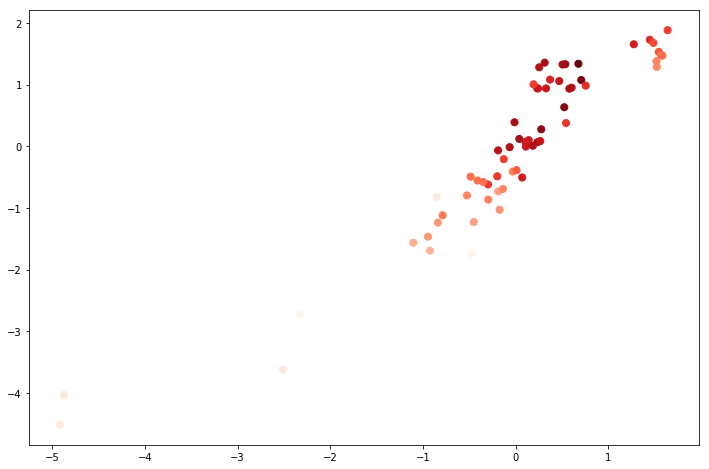

In [39]:
coords = manifold.MDS(random_state=0).fit_transform(df[metric_names].values)
plt.figure(figsize=(12,8))
plt.scatter(coords[:,0], coords[:,1], s=50, c=df['mean_rank'], cmap='Reds')

### Look at correlation between the metrics

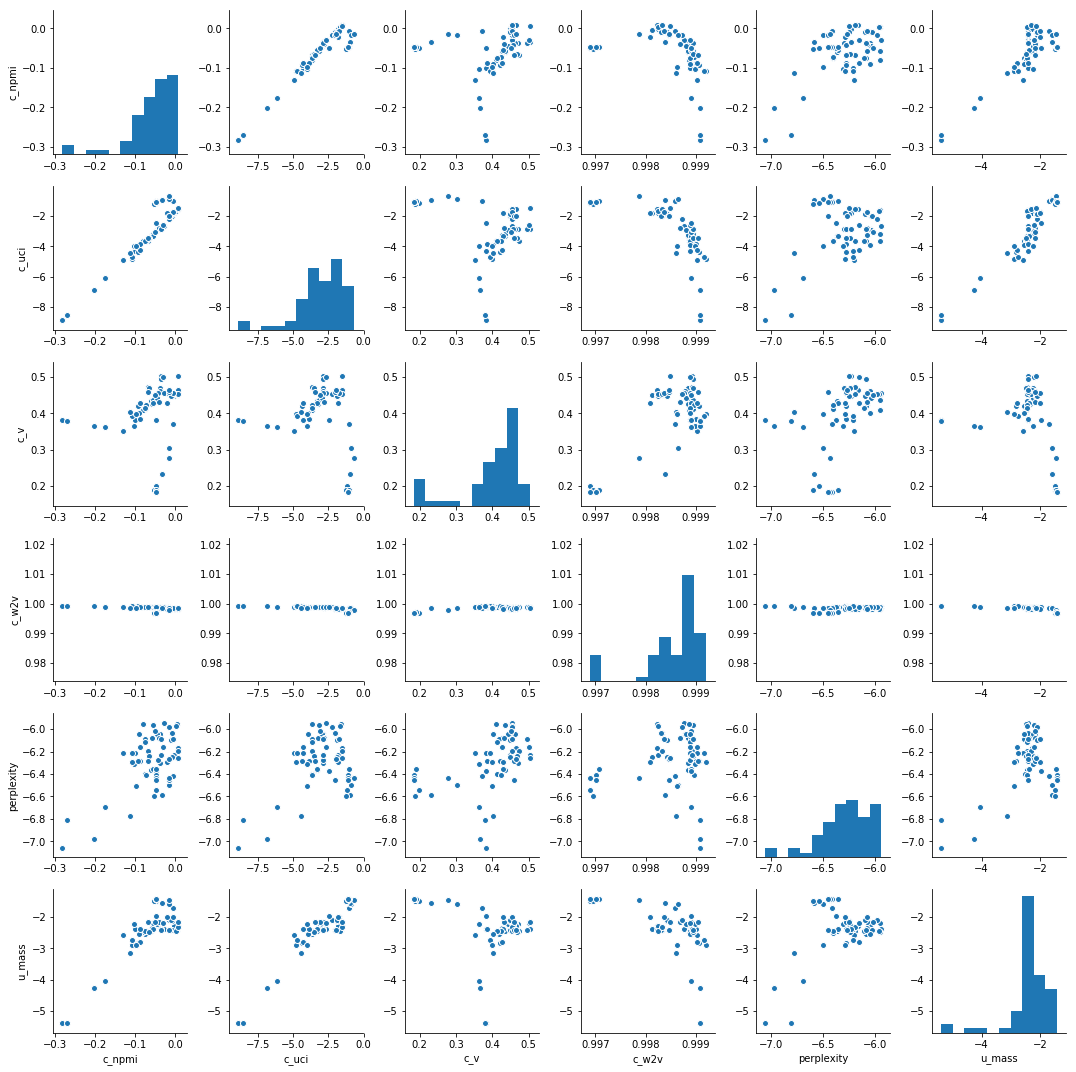

In [40]:
sns.pairplot(df[metric_names])

Some are correlated, most are not. Let's look at the values, but using rank, or Spearman correlation.

In [61]:
df[metric_names].corr('spearman')

,c_npmi,c_uci,c_v,c_w2v,perplexity,u_mass
c_npmi,1.000000,0.842938,0.480465,-0.704014,0.328804,0.566836
c_uci,0.842938,1.000000,0.040365,-0.852933,0.011470,0.820094
c_v,0.480465,0.040365,1.000000,0.057488,0.564047,-0.102159
c_w2v,-0.704014,-0.852933,0.057488,1.000000,0.005907,-0.629424
perplexity,0.328804,0.011470,0.564047,0.005907,1.000000,-0.043363
u_mass,0.566836,0.820094,-0.102159,-0.629424,-0.043363,1.000000


### Subgroup correlation analysis

In [66]:
subdf = df[metric_names + param_names]
subdf.head()

,c_npmi,c_uci,c_v,c_w2v,perplexity,u_mass,alpha,beta,num_topics
0,-0.003759,-1.836443,0.449097,0.998124,-6.246609,-2.393090,0.01,0.01,5
1,-0.037455,-2.854046,0.470005,0.998854,-6.302226,-2.233028,0.01,0.01,10
2,-0.059600,-3.329506,0.433467,0.998855,-6.363658,-2.439774,0.01,0.01,15
3,-0.075871,-3.677816,0.412369,0.998948,-6.402373,-2.509307,0.01,0.01,20
4,-0.008113,-2.012630,0.449335,0.998335,-6.038808,-2.413199,0.01,0.10,5


In [98]:
from itertools import chain

def compute_corr_group(df, param):
    '''Group the dataframe by the given param and perform Spearman correlation.'''
    results = []
    for k, g in df.groupby(param):
        corr_df = g[metric_names].corr('spearman')
        result = {}
        result[param] = k
        result['values'] = corr_df.values
        for i in range(len(result['values'])):
            result['values'][i][i] = -999
        results.append(result)

    return results

In [99]:
def compute_overall_corr(df):
    result = {
        'overall': True, 
        'values': df[metric_names].corr('spearman').values
    }
        
    for i in range(len(result['values'])):
        result['values'][i][i] = -999
        
    return result

In [100]:
all_corrs = list(chain.from_iterable([compute_corr_group(df, param) for param in param_names]))
all_corrs.append(compute_overall_corr(df))

OK, now we have 13 sets of correlations. Each set has 6 x 5 = 30 pairs. Which correlation value is the highest?

In [105]:
all_corrs[8]['values'].max()

0.54157483388883942

In [80]:
with open('../data/test.json', 'w') as f:
    json.dump(data, f)

[{'alpha': 0.01,
  'values': [[None,
    0.9823529411764705,
    0.7294117647058823,
    -0.861764705882353,
    0.3058823529411765,
    0.6088235294117647],
   [0.9823529411764705,
    None,
    0.65,
    -0.8941176470588236,
    0.3941176470588235,
    0.6058823529411764],
   [0.7294117647058823,
    0.65,
    None,
    -0.5058823529411764,
    0.1588235294117647,
    0.5529411764705883],
   [-0.861764705882353,
    -0.8941176470588236,
    -0.5058823529411764,
    None,
    -0.3088235294117647,
    -0.49117647058823527],
   [0.3058823529411765,
    0.3941176470588235,
    0.1588235294117647,
    -0.3088235294117647,
    None,
    0.18823529411764706],
   [0.6088235294117647,
    0.6058823529411764,
    0.5529411764705883,
    -0.49117647058823527,
    0.18823529411764706,
    None]]},
 {'alpha': 0.10000000000000001,
  'values': [[None,
    1.0,
    0.7029411764705882,
    -0.8823529411764706,
    0.49117647058823527,
    0.29411764705882354],
   [1.0,
    None,
    0.702941176470588

In [76]:
0.1*3==0.3

False

In [62]:
len(df)

64

In [54]:
for k, v in subdf.groupby('alpha'):
    print(type(v))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### Exports metrics

In [51]:
coords[0]

array([0.37200972, 1.08131546])

In [50]:
for i, model in enumerate(models):
    model['coords'] = coords[i]
    model.pop('lda', None)
    
with open('../data/lee-metrics.json', 'w') as f:
    json.dump(models, f)

TypeError: Object of type 'ndarray' is not JSON serializable

It seems that u_mass, c_uci and c_npmi correlate well. Let's focus on those metrics only.

In [40]:
focus_measures = ['u_mass', 'c_uci', 'c_npmi']

### Look at metrics with different parameter groupings

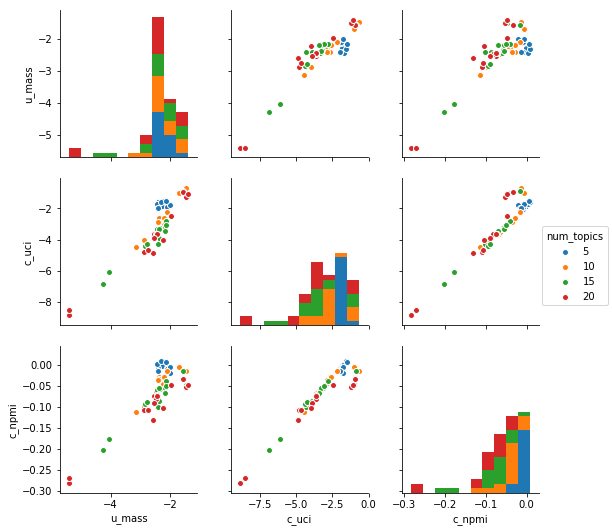

In [43]:
sns.pairplot(df, vars=focus_measures, hue='num_topics')

In [33]:
rank_df = df[focus_measures].rank()
rank_df.head()

,u_mass,c_uci,c_npmi
0,32.0,46.0,58.0
1,41.0,32.0,40.0
2,20.0,24.0,24.0
3,14.0,16.0,17.0
4,24.0,40.5,54.0


In [35]:
rank_df.corr()

,u_mass,c_uci,c_npmi
u_mass,1.000000,0.820094,0.566836
c_uci,0.820094,1.000000,0.842938
c_npmi,0.566836,0.842938,1.000000


In [37]:
df[measure_names].rank().corr()

,u_mass,c_v,c_uci,c_npmi,c_w2v
u_mass,1.000000,-0.102159,0.820094,0.566836,-0.652365
c_v,-0.102159,1.000000,0.040365,0.480465,0.027542
c_uci,0.820094,0.040365,1.000000,0.842938,-0.865434
c_npmi,0.566836,0.480465,0.842938,1.000000,-0.722925
c_w2v,-0.652365,0.027542,-0.865434,-0.722925,1.000000


In [44]:
df[measure_names].corr()

,u_mass,c_v,c_uci,c_npmi,c_w2v
u_mass,1.000000,-0.287806,0.912185,0.818642,-0.559131
c_v,-0.287806,1.000000,-0.194675,0.173627,0.694179
c_uci,0.912185,-0.194675,1.000000,0.927210,-0.651474
c_npmi,0.818642,0.173627,0.927210,1.000000,-0.385126
c_w2v,-0.559131,0.694179,-0.651474,-0.385126,1.000000


---

In [19]:
%load_ext autoreload
%autoreload 2